In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
data = pd.read_csv('/Users/sakshambhatia/Documents/titanic/train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
data['Age'].fillna(data['Age'].mean(),inplace=True)

In [7]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [8]:
data['Embarked'].fillna(data['Embarked'].mode()[0],inplace=True)

In [9]:
data.dropna(axis='columns',inplace=True)

In [10]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [11]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [12]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [13]:
data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


In [14]:
categorical = ['Survived','Pclass','Sex','SibSp','Parch','Embarked']
numeric = ['Age','Fare']

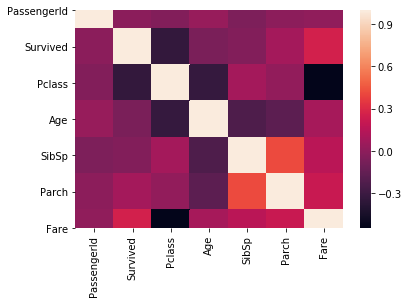

In [15]:
sns.heatmap(data.corr())

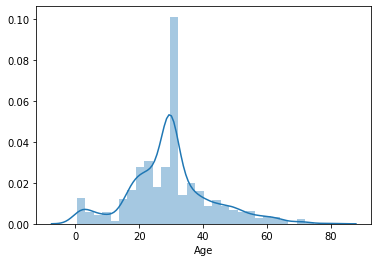

In [16]:
sns.distplot(data['Age'])

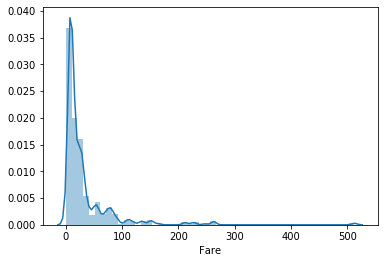

In [17]:
sns.distplot(data['Fare'])

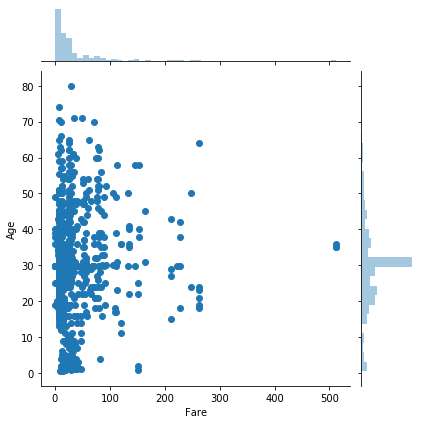

In [18]:
sns.jointplot(x='Fare',y='Age',data=data)

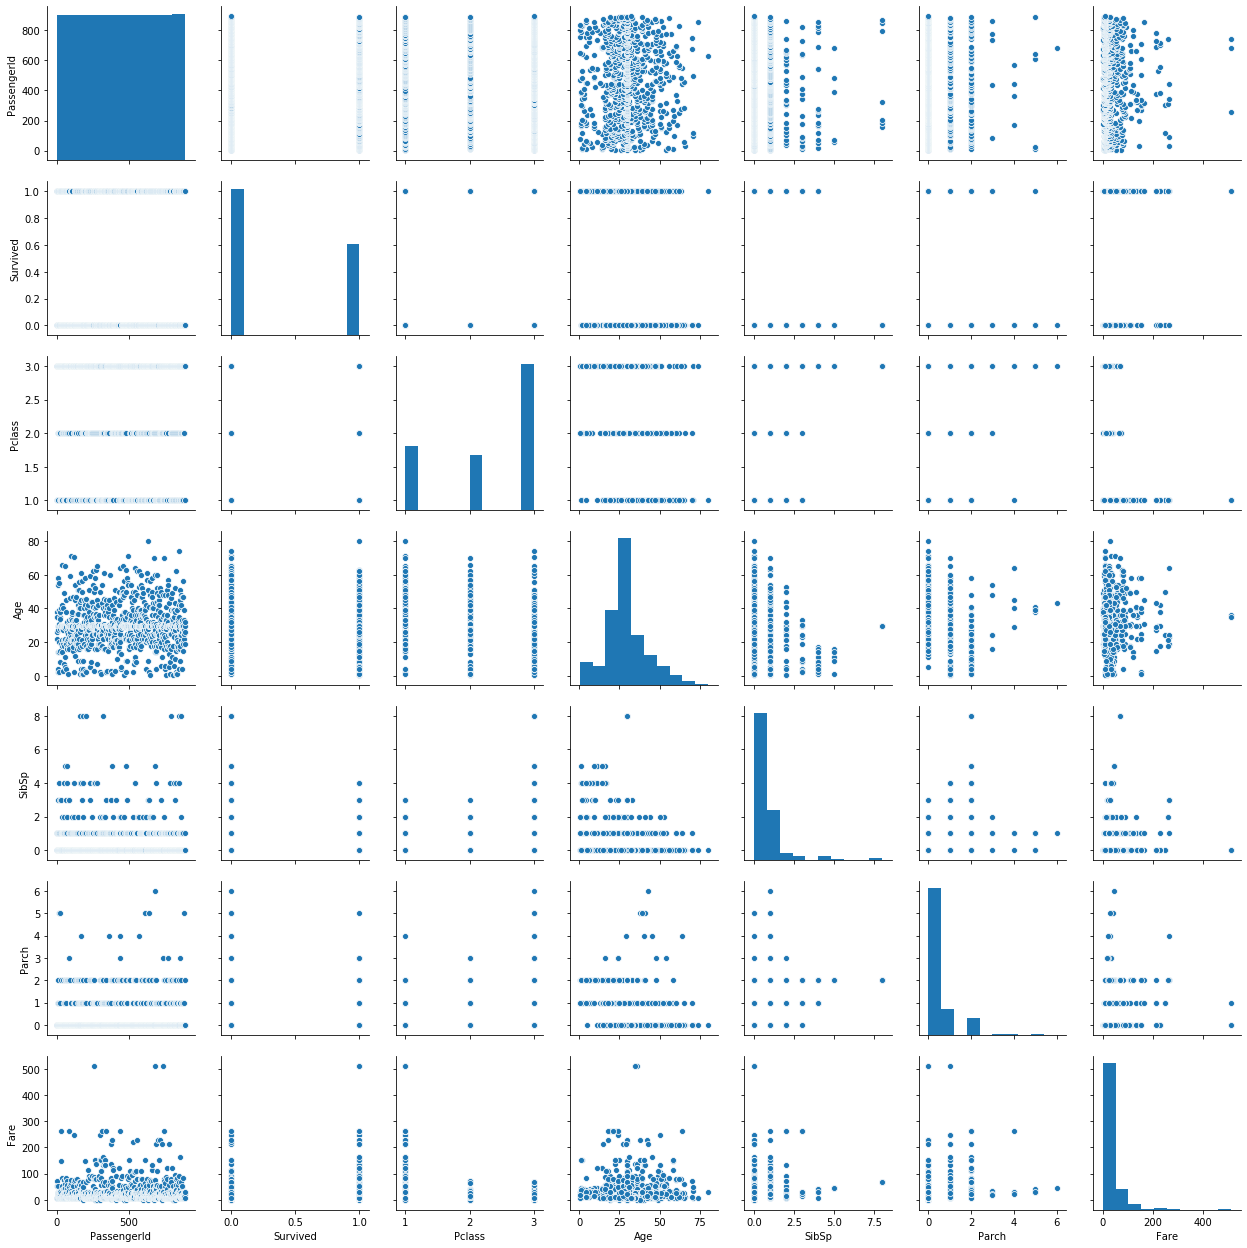

In [19]:
sns.pairplot(data=data)

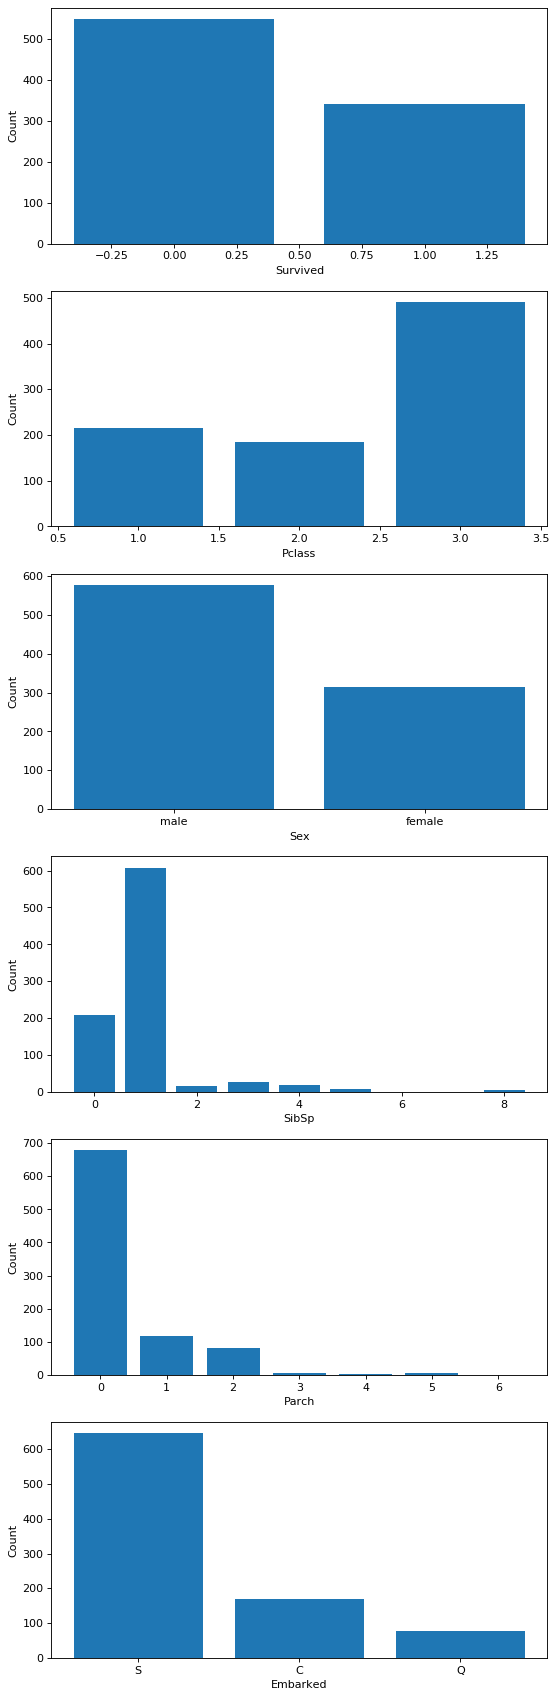

In [20]:
fig=plt.figure(figsize=(8, 32), dpi= 80, facecolor='w', edgecolor='k')

for i in range(len(categorical)):
    plt.subplot(len(categorical)+1,1,i+1)
    plt.bar(data[categorical[i]].dropna().unique(),data[categorical[i]].dropna().value_counts())
    plt.xlabel(categorical[i])
    plt.ylabel("Count")

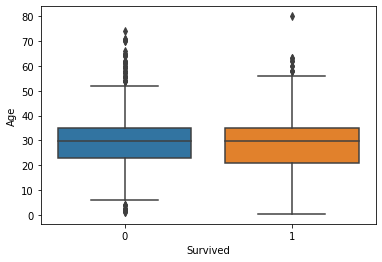

In [21]:
sns.boxplot(x='Survived',y='Age',data=data)

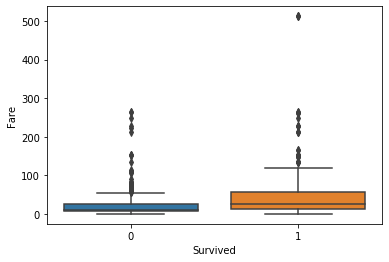

In [22]:
sns.boxplot(x='Survived',y='Fare',data=data)

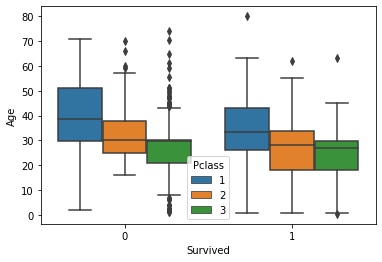

In [23]:
sns.boxplot(x='Survived',y='Age',data=data,hue='Pclass')

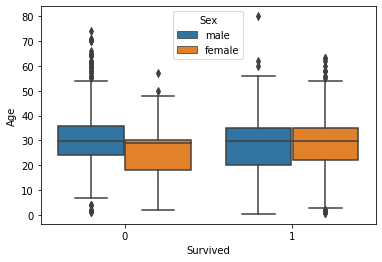

In [24]:
sns.boxplot(x='Survived',y='Age',data=data,hue='Sex')

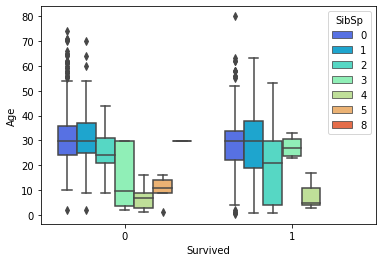

In [25]:
sns.boxplot(x='Survived',y='Age',data=data,hue='SibSp',palette='rainbow')

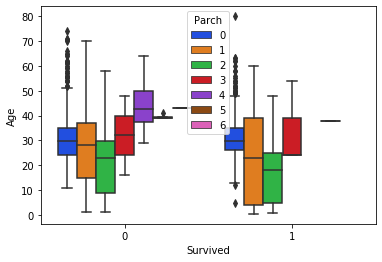

In [26]:
sns.boxplot(x='Survived',y='Age',data=data,hue='Parch',palette='bright')

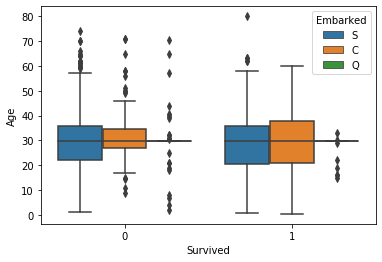

In [27]:
sns.boxplot(x='Survived',y='Age',data=data,hue='Embarked')

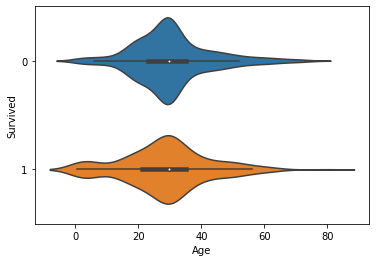

In [28]:
sns.violinplot(y='Survived',x='Age',data=data,orient='h')

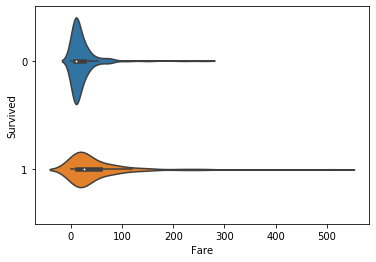

In [29]:
sns.violinplot(y='Survived',x='Fare',data=data,orient='h')

In [30]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [31]:
data_test=pd.read_csv("/Users/sakshambhatia/Documents/titanic/test_clean.csv")

In [32]:
mix_data = pd.concat([data,data_test],axis=0)

/Users/sakshambhatia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [33]:
mix_data

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.00000,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.00000,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.00000,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.00000,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.00000,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450
...,...,...,...,...,...,...,...,...,...,...,...
413,30.27259,S,8.0500,"Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236
414,39.00000,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,NaN,PC 17758
415,38.50000,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,NaN,SOTON/O.Q. 3101262
416,30.27259,S,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309


In [34]:
gender = pd.get_dummies(data=mix_data['Sex'],drop_first=True)

In [35]:
encoder = preprocessing.LabelEncoder()

In [36]:
encoder.fit(list(mix_data['Embarked']))

LabelEncoder()

In [37]:
encoder.classes_

array(['C', 'Q', 'S'], dtype='<U1')

In [38]:
emb = pd.DataFrame(encoder.transform(list(mix_data['Embarked'])))

In [39]:
emb[0].value_counts()

2    916
0    270
1    123
Name: 0, dtype: int64

In [40]:
emb.rename({0:"Embarked"},axis=1,inplace=True)

dd

In [41]:
emb

,Embarked
0,2
1,0
2,2
3,2
4,2
...,...
1304,2
1305,0
1306,2
1307,2


In [42]:
mix_data.drop(['PassengerId','Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [43]:
mix_data.head()

,Age,Fare,Parch,Pclass,SibSp,Survived
0,22.0,7.2500,0,3,1,0.0
1,38.0,71.2833,0,1,1,1.0
2,26.0,7.9250,0,3,0,1.0
3,35.0,53.1000,0,1,1,1.0
4,35.0,8.0500,0,3,0,0.0


In [44]:
final_data=pd.concat([mix_data,gender,emb],axis=1,join_axes=[mix_data.index])

/Users/sakshambhatia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  """Entry point for launching an IPython kernel.


In [45]:
final_data.head()

,Age,Fare,Parch,Pclass,SibSp,Survived,male,Embarked
0,22.0,7.2500,0,3,1,0.0,1,2
1,38.0,71.2833,0,1,1,1.0,0,0
2,26.0,7.9250,0,3,0,1.0,0,2
3,35.0,53.1000,0,1,1,1.0,0,2
4,35.0,8.0500,0,3,0,0.0,1,2


In [63]:
test_data = final_data[final_data["Survived"].isna()]
test_data.dropna(axis=1,inplace=True)
test_data.head()

/Users/sakshambhatia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Age,Fare,Parch,Pclass,SibSp,male,Embarked
0,34.5,7.8292,0,3,0,1,2
1,47.0,7.0000,0,3,1,0,0
2,62.0,9.6875,0,2,0,1,2
3,27.0,8.6625,0,3,0,1,2
4,22.0,12.2875,1,3,1,0,2


In [48]:
train_data = final_data[~final_data["Survived"].isna()]

In [49]:
X_train = train_data[['Age', 'Fare', 'Parch', 'Pclass', 'SibSp', 'male','Embarked']]
X_train.head()

,Age,Fare,Parch,Pclass,SibSp,male,Embarked
0,22.0,7.2500,0,3,1,1,2
1,38.0,71.2833,0,1,1,0,0
2,26.0,7.9250,0,3,0,0,2
3,35.0,53.1000,0,1,1,0,2
4,35.0,8.0500,0,3,0,1,2


In [50]:
y_train = train_data['Survived']
y_train.head()

0    0.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: Survived, dtype: float64

In [51]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier  
from sklearn import svm

In [52]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [53]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train,y_train)

/Users/sakshambhatia/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [54]:
knn9 = KNeighborsClassifier(n_neighbors=9)  
knn9.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [55]:
knn7 = KNeighborsClassifier(n_neighbors=7)  
knn7.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [56]:
knn5 = KNeighborsClassifier(n_neighbors=5)  
knn5.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [57]:
logisticreg = LogisticRegression()
logisticreg.fit(X_train,y_train)

/Users/sakshambhatia/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [58]:
svm = svm.SVC()
svm.fit(X_train,y_train)

/Users/sakshambhatia/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [75]:
y_test = pd.read_csv("/Users/sakshambhatia/Downloads/results/submission.csv")
y_test.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [76]:
y_test = y_test["Survived"]

In [77]:
y_decisiontree = decision_tree.predict(test_data)
y_randomforest = random_forest.predict(test_data)
y_knn9 = knn9.predict(test_data)
y_knn7 = knn7.predict(test_data)
y_knn5 = knn5.predict(test_data)
y_logreg = logisticreg.predict(test_data)
y_svm = svm.predict(test_data)

In [78]:
print("DECISION TREE")
print(classification_report(y_test,y_decisiontree))
print("RANDOM FOREST")
print(classification_report(y_test,y_randomforest))
print("KNN 9 NEIGHBOURS")
print(classification_report(y_test,y_knn9))
print("KNN 7 NEIGHBOURS")
print(classification_report(y_test,y_knn7))
print("KNN 5 NEIGHBOURS")
print(classification_report(y_test,y_knn5))
print("LOGISTIC REGRESSION")
print(classification_report(y_test,y_logreg))
print("SUPPORT VECTOR MACHINE")
print(classification_report(y_test,y_svm))

DECISION TREE
              precision    recall  f1-score   support

           0       0.78      0.79      0.78       260
           1       0.64      0.63      0.63       158

    accuracy                           0.73       418
   macro avg       0.71      0.71      0.71       418
weighted avg       0.73      0.73      0.73       418

RANDOM FOREST
              precision    recall  f1-score   support

           0       0.77      0.83      0.80       260
           1       0.68      0.59      0.63       158

    accuracy                           0.74       418
   macro avg       0.72      0.71      0.71       418
weighted avg       0.73      0.74      0.74       418

KNN 9 NEIGHBOURS
              precision    recall  f1-score   support

           0       0.71      0.75      0.73       260
           1       0.54      0.49      0.52       158

    accuracy                           0.65       418
   macro avg       0.62      0.62      0.62       418
weighted avg       0.65      

In [85]:
passenger_id=data_test["PassengerId"]
passenger_id.head()

0    892
1    893
2    894
3    895
4    896
Name: PassengerId, dtype: int64

In [94]:
y_out = pd.concat([passenger_id,pd.DataFrame(y_logreg.astype(int))],axis=1)
y_out.head()

,PassengerId,0
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [92]:
y_out.rename({0:"Survived"},axis=1,inplace=True)
y_out.head()

,PassengerId,Survived
0,892,0.0
1,893,0.0
2,894,0.0
3,895,0.0
4,896,1.0


In [93]:
y_out.to_csv("/Users/sakshambhatia/Documents/titanic/output.csv",index=False)